<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://ttgmice.2017.ttgasia.com/wp-content/uploads/sites/3/2023/09/Ringitt_640.jpeg)"><b><span style='color:white'>Jobs Listing in Malaysia </span></b> </div>


<br>

# <span style="color:#E888BB; font-size: 1%;"> 1 | Introduction </span>
<div style="padding: 30px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;background-color:#F1C40F;overflow:hidden;background-image: url(https://ttgmice.2017.ttgasia.com/wp-content/uploads/sites/3/2023/09/Ringitt_640.jpeg)"><b><span style='color:white'> Introduction </span></b> </div>

<br>


## <b>I <span style='color:#85BB65'>|</span> Objective</b>

1. To analyze key trends in job market by examining job categories, locations, and salary ranges

2. To predict The expected salary range for job postings based on other features

3. To recommend actionable insights for job seekers and recruiters

## <b>II <span style='color:#85BB65'>|</span> Import libraries</b>
Data sources: Kaggle https://www.kaggle.com/datasets/azraimohamad/jobstreet-all-job-dataset (Sourcing Date: 30th October 2024)\
Job postings: by states, job categories, types, and salaries
from 23rd March 2023 - 19th June 2024


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import Statistics libraries
from scipy import stats
from scipy.stats import norm

# Import Scikit-learn for Machine Learning libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

In [3]:
#Set Random Seeds to ensure consistency
import random
sd = 12
random.seed(sd)
np.random.seed(sd)
print("Seeds have been set!")

Seeds have been set!


## <b>III <span style='color:#85BB65'>|</span> Input data</b>

Refer dataset link https://drive.google.com/drive/folders/1Iv0G6D-N1EsVWvul4u_vAF7uma4TcTaJ?usp=drive_link

In [4]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Sem1/WQD7001 Principle of DS/Group Project/Dataset/jobstreet_all_job_dataset.csv")

Mounted at /content/drive


In [5]:
#MetaData
!pip install ydata-profiling
from ydata_profiling import ProfileReport

# Generate a profiling report
profile = ProfileReport(df, title="Jobstreet Job Data Profiling Report", explorative=True)

# Save the report as an HTML file
profile.to_file("jobstreet_data_report.html")

# OR visualize directly in Jupyter Notebook (if you're using it)
profile.to_notebook_iframe()


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 47.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=fadd4607ab9ec8fce2b7025946f053e26f10f2e7c7790df649173aedd16f226e
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# <span style="color:#E888BB; font-size: 1%;">2 | Data Preprocessing and EDA </span>
<div style="padding: 30px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;background-color:#F1C40F;overflow:hidden;background-image: url(https://ttgmice.2017.ttgasia.com/wp-content/uploads/sites/3/2023/09/Ringitt_640.jpeg)"><b><span style='color:white'>2 | Data Preprocessing and EDA </span></b> </div>

<br>

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 1. Data Quality</span></b> </div>

### <b>I <span style='color:#85BB65'>|</span> Check null and Missing Values</b>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59306 entries, 0 to 59305
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_id        59306 non-null  int64 
 1   job_title     59306 non-null  object
 2   company       59306 non-null  object
 3   descriptions  59306 non-null  object
 4   location      59306 non-null  object
 5   category      59306 non-null  object
 6   subcategory   59306 non-null  object
 7   role          57370 non-null  object
 8   type          59306 non-null  object
 9   salary        26641 non-null  object
 10  listingDate   59306 non-null  object
dtypes: int64(1), object(10)
memory usage: 5.0+ MB


In [7]:
#check missing ratio
data_na = (df.isnull().sum() / len(df)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data

Missing Ratio
salary      55.078744
role         3.264425

### <b>II <span style='color:#85BB65'>|</span> Check Duplicates</b>

In [8]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 11)


**Observation**: No duplicates

### <b>III <span style='color:#85BB65'>|</span> Check Unique Value in each columns</b>

In [9]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

job_id: 59306 distinct values
job_title: 34686 distinct values
company: 17958 distinct values
descriptions: 54196 distinct values
location: 204 distinct values
category: 30 distinct values
subcategory: 305 distinct values
role: 4930 distinct values
type: 4 distinct values
salary: 1871 distinct values
listingDate: 50880 distinct values


### <b>IV <span style='color:#85BB65'>|</span> Explore the data</b>

In [10]:
df.head()

job_id                                     job_title  \
0  74630583              Procurement Executive (Contract)   
1  74660602                  Account Executive/ Assistant   
2  74655679  Data Analyst - Asset Management, SPX Express   
3  74657624                              Service Engineer   
4  74679363                          Purchasing Executive   

                                  company  \
0   Coca-Cola Bottlers (Malaysia) Sdn Bhd   
1      Acoustic & Lighting System Sdn Bhd   
2          Shopee Mobile Malaysia Sdn Bhd   
3             Sun Medical Systems Sdn Bhd   
4  Magnet Security & Automation Sdn. Bhd.   

                                        descriptions         location  \
0  Position Purpose\nManage aspects of procuremen...  Negeri Sembilan   
1  We are looking for a Account Executive/ Assist...         Petaling   
2  Performs detailed data analysis on existing sp...   Klang District   
3  You are important for troubleshooting, install...         Petaling   
4  MAG is a trailblazer in the industry, boasting...      Hulu Langat   

                               category  \
0  Manufacturing, Transport & Logistics   
1                            Accounting   
2  Manufacturing, Transport & Logistics   
3                           Engineering   
4  Manufacturing, Transport & Logistics   

                               subcategory                      role  \
0      Purchasing, Procurement & Inventory     procurement-executive   
1  Bookkeeping & Small Practice Accounting       executive-assistant   
2                     Analysis & Reporting  asset-management-analyst   
3        Electrical/Electronic Engineering         services-engineer   
4      Purchasing, Procurement & Inventory      purchasing-executive   

            type                         salary           listingDate  
0  Contract/Temp                            NaN  2024-03-21T05:58:35Z  
1      Full time  RM 2,800 – RM 3,200 per month  2024-03-22T06:52:57Z  
2      Full time                            NaN  2024-03-22T04:22:43Z  
3      Full time  RM 3,000 – RM 3,500 per month  2024-03-22T05:32:09Z  
4      Full time  RM 2,800 – RM 3,500 per month  2024-03-23T03:56:39Z

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 2. Data Cleaning </span></b> </div>

### <b>I <span style='color:#85BB65'>|</span> Data Cleaning on Target Attribute - Salary</b>

1. **Handle missing value**:
Drop missing value

2. **Remove outliers**:
Using IQR

In [11]:
# since salary is the target variable
# remove data without target variable

df = df[df['salary'].notna()]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26641 entries, 1 to 59303
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_id        26641 non-null  int64 
 1   job_title     26641 non-null  object
 2   company       26641 non-null  object
 3   descriptions  26641 non-null  object
 4   location      26641 non-null  object
 5   category      26641 non-null  object
 6   subcategory   26641 non-null  object
 7   role          25993 non-null  object
 8   type          26641 non-null  object
 9   salary        26641 non-null  object
 10  listingDate   26641 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.4+ MB


In [13]:
# Split salary into lower and upper bound salary
df[['lower_bound_salary', 'upper_bound_salary']] = df['salary'].str.split(r'–|-', n=1, expand=True)

# Define a cleaning pattern to remove unwanted text and symbols
cleaning_pattern = r'RM\s?|MYR\s?|\$\s?|,|\s?per month|\s?per year|\s?p.m.'

# Apply the cleaning pattern to both columns
df['lower_bound_salary'] = df['lower_bound_salary'].str.replace(cleaning_pattern, '', regex=True)
df['upper_bound_salary'] = df['upper_bound_salary'].str.replace(cleaning_pattern, '', regex=True)

df['lower_bound_salary'] = df['lower_bound_salary'].str.replace('k', '000', regex=True)
df['upper_bound_salary'] = df['upper_bound_salary'].str.replace('k', '000', regex=True)

In [14]:
# Convert the lower bound and upper bound salary to numeric
df['lower_bound_salary'] = pd.to_numeric(df['lower_bound_salary'], errors='coerce')
df['upper_bound_salary'] = pd.to_numeric(df['upper_bound_salary'], errors='coerce')
df_cleanned = df[df['lower_bound_salary'].notna()]
# For salary only contain lower bound salary, fill the upper bound salary with the lower bound value
df_cleanned['upper_bound_salary'] =df_cleanned['upper_bound_salary'].fillna(df_cleanned['lower_bound_salary'])
df_cleanned['average_salary'] = (df_cleanned['lower_bound_salary'] + df_cleanned['upper_bound_salary'])/2

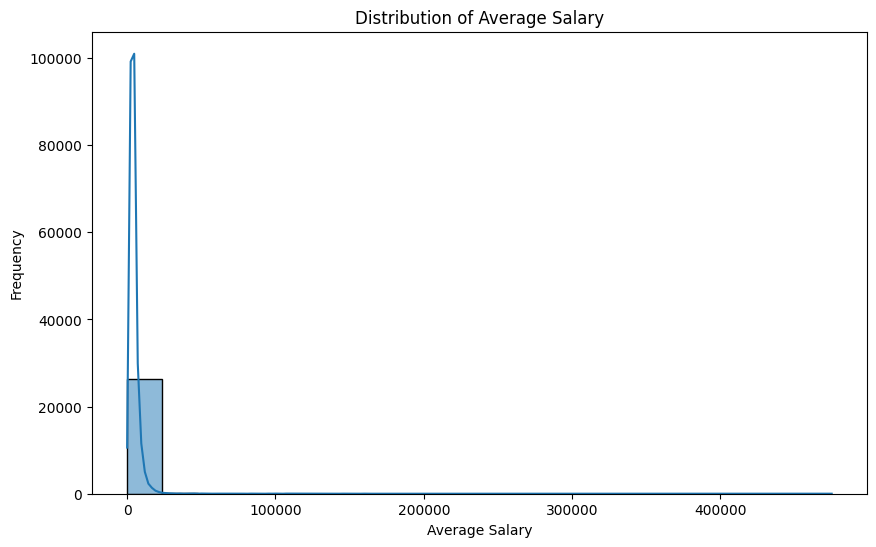

In [15]:
# Generate a histogram plot for the average salary
plt.figure(figsize=(10, 6))
sns.histplot(df_cleanned['average_salary'], bins=20, kde=True)
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Average Salary')
plt.show()

In [16]:
# Calculate Q1, Q3, and IQR for average_salary
Q1 = df_cleanned['average_salary'].quantile(0.25)
Q3 = df_cleanned['average_salary'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_no_outliers = df_cleanned[(df_cleanned['average_salary'] >= lower_bound) & (df_cleanned['average_salary'] <= upper_bound)]

In [17]:
df_no_outliers['average_salary'].describe()

count    24133.000000
mean      3886.350205
std       1481.355776
min          1.000000
25%       3000.000000
50%       3750.000000
75%       4750.000000
max       8000.000000
Name: average_salary, dtype: float64

In [18]:
df_no_outliers = df_no_outliers[df_no_outliers['average_salary']>100]

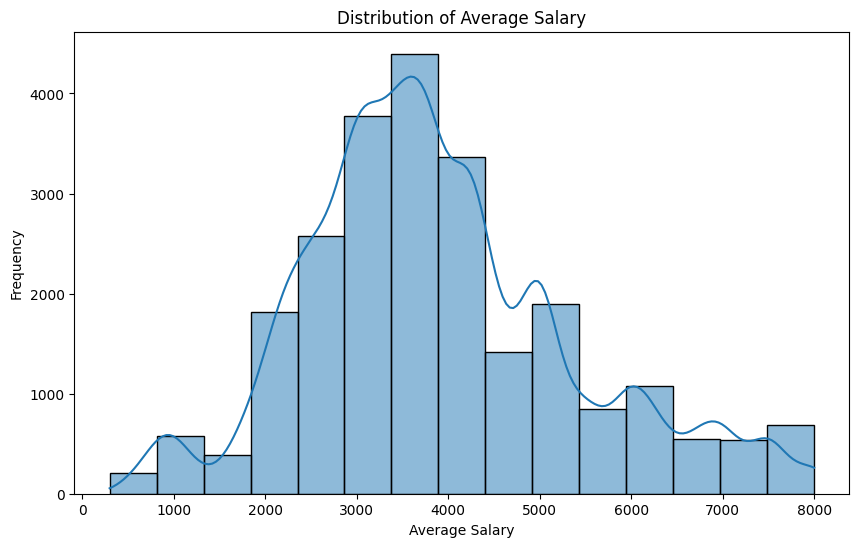

In [19]:
# Generate a histogram plot for the average salary
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['average_salary'], bins=15, kde=True)
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Average Salary')
plt.show()

In [20]:
df_no_outliers['average_salary'].describe()

count    24088.000000
mean      3893.578124
std       1473.260115
min        300.000000
25%       3000.000000
50%       3750.000000
75%       4750.000000
max       8000.000000
Name: average_salary, dtype: float64

average_salary: mu = 3893.58, sigma = 1473.23
average_salary: Skewness: 0.56
average_salary: Kurtosis: 0.23


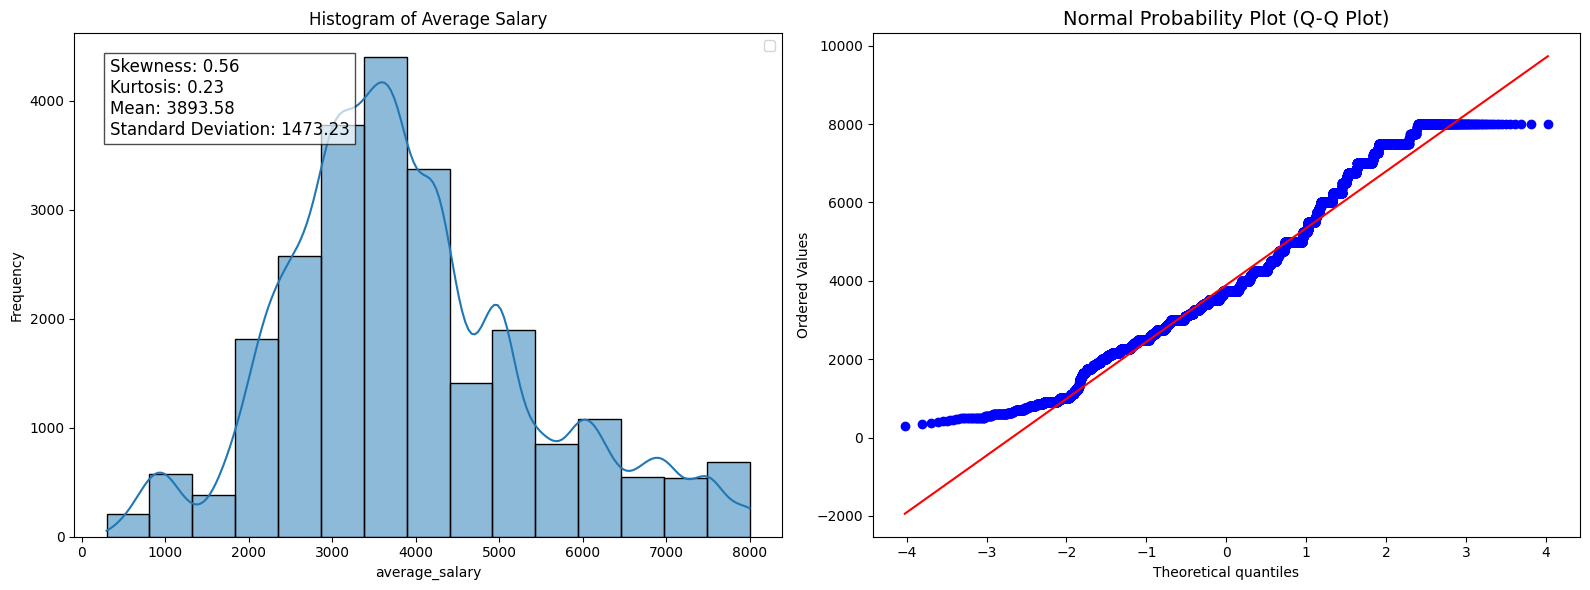

In [21]:
# Create a list of the columns to analyze
columns = ['average_salary']

# Loop over the columns and plot the distribution of each variable
for col in columns:
    # Create a figure with two subplots (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot 1: Histogram with KDE and normal distribution fit on the left
    sns.histplot(df_no_outliers[col], bins=15, kde=True, edgecolor='black', stat="count", ax=axes[0])

    # Fit a normal distribution to the data
    (mu, sigma) = stats.norm.fit(df_no_outliers[col])
    print('{}: mu = {:.2f}, sigma = {:.2f}'.format(col, mu, sigma))

    # Add the fitted normal distribution to the histogram
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)

    # Calculate skewness and kurtosis
    skewness = df_no_outliers[col].skew()
    kurtosis = df_no_outliers[col].kurt()
    print('{}: Skewness: {:.2f}'.format(col, skewness))
    print('{}: Kurtosis: {:.2f}'.format(col, kurtosis))

    # Display skewness and kurtosis as text on the histogram plot
    text_str = f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}\nMean: {mu:.2f}\nStandard Deviation: {sigma:.2f}'
    axes[0].text(0.05, 0.95, text_str, transform=axes[0].transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

    # Add labels and title to the histogram plot
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Histogram of Average Salary'.format(col))
    axes[0].legend()

    # Plot 2: Q-Q plot on the right
    stats.probplot(df_no_outliers[col], plot=axes[1])
    axes[1].set_title('Normal Probability Plot (Q-Q Plot)', fontsize=14)

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plots
    plt.show()

### <b>II <span style='color:#85BB65'>|</span> Data Cleaning on Independent Attribute</b>



#### <b> Data Cleaning on Location</b>

- Create a new column called 'State' and Assign each location to state

In [22]:
df_location  = pd.read_csv("/content/drive/MyDrive/Sem1/WQD7001 Principle of DS/Group Project/Dataset/updated_location_with_state.csv")

In [23]:
# Merge location to the job street dataset to assign state to the location
df_no_outliers = df_no_outliers.merge(df_location, how='left', left_on='location',right_on='Location')
df_no_outliers.rename(columns={'State':'state'}, inplace=True)

In [24]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24088 entries, 0 to 24087
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_id              24088 non-null  int64  
 1   job_title           24088 non-null  object 
 2   company             24088 non-null  object 
 3   descriptions        24088 non-null  object 
 4   location            24088 non-null  object 
 5   category            24088 non-null  object 
 6   subcategory         24088 non-null  object 
 7   role                23493 non-null  object 
 8   type                24088 non-null  object 
 9   salary              24088 non-null  object 
 10  listingDate         24088 non-null  object 
 11  lower_bound_salary  24088 non-null  float64
 12  upper_bound_salary  24088 non-null  float64
 13  average_salary      24088 non-null  float64
 14  Location            24088 non-null  object 
 15  state               23985 non-null  object 
dtypes: f

In [25]:
# return unique count of state for each record
df_no_outliers['state'].value_counts().sort_values(ascending=False)

state
Selangor           9736
Kuala Lumpur       6735
Johor              3050
Pulau Pinang       2159
Sarawak             468
Perak               418
Sabah               392
Melaka              367
Kedah               274
Pahang              166
Terengganu           67
Negeri Sembilan      55
Putrajaya            42
Kelantan             41
Labuan               13
Perlis                2
Name: count, dtype: int64

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, 0.0, '0'),
  Text(0, 2000.0, '2000'),
  Text(0, 4000.0, '4000'),
  Text(0, 6000.0, '6000'),
  Text(0, 8000.0, '8000'),
  Text(0, 10000.0, '10000'),
  Text(0, 12000.0, '12000')])

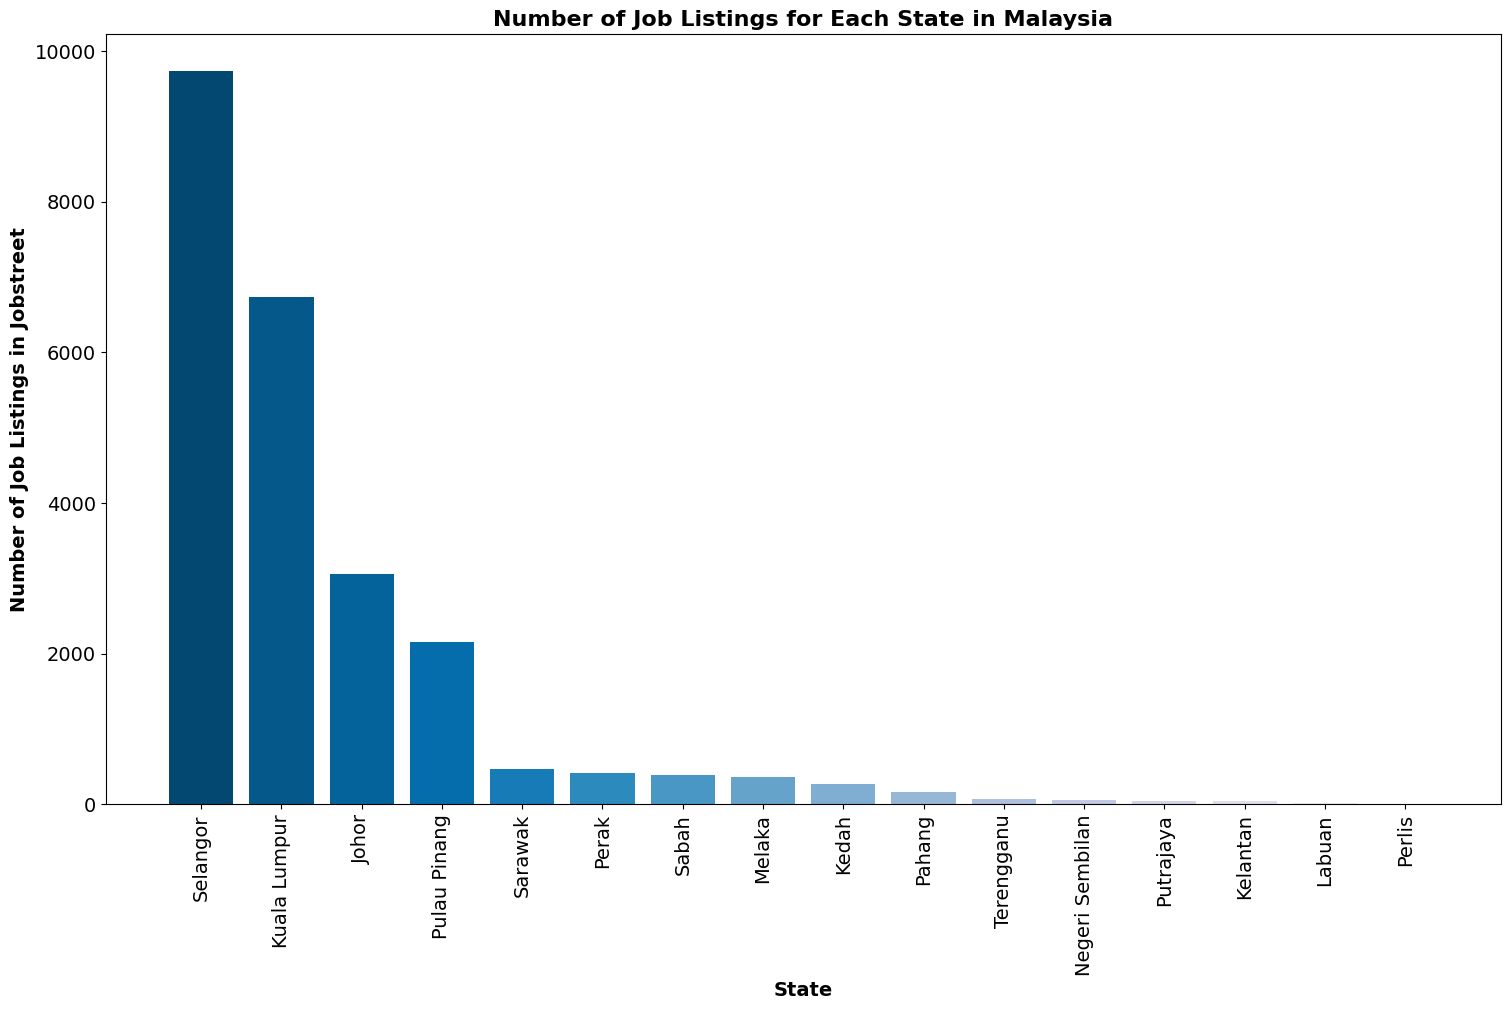

In [26]:
# Get the counts of job listings by state
state_counts = df_no_outliers['state'].value_counts()

# Create the bar chart
fig = plt.figure(figsize=(18, 10))

# Generate a reversed color palette so darker shades correspond to higher values
sequential_colors = sns.color_palette("PuBu", len(state_counts))[::-1]  # Reversing the palette

# Sort the state_counts to align colors from highest to lowest
state_counts = state_counts.sort_values(ascending=False)

# Map the colors: higher counts get darker shades
colors = [sequential_colors[i] for i in range(len(state_counts))]

# Plot the bar chart with the mapped colors
plt.bar(state_counts.index, state_counts.values, color=colors)

# Add labels and title with bold text and increased font size
plt.xlabel('State', fontsize=14, fontweight='bold')
plt.ylabel('Number of Job Listings in Jobstreet', fontsize=14, fontweight='bold')
plt.title('Number of Job Listings for Each State in Malaysia', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)


#### <b> Data Cleaning on Category</b>

- Generalize the Job Category

In [27]:
df_category = pd.read_excel("/content/drive/MyDrive/Sem1/WQD7001 Principle of DS/Group Project/Dataset/category_mapping.xlsx")

In [28]:
df_no_outliers = df_no_outliers.merge(df_category, left_on='category', right_on='Categories (raw data)')

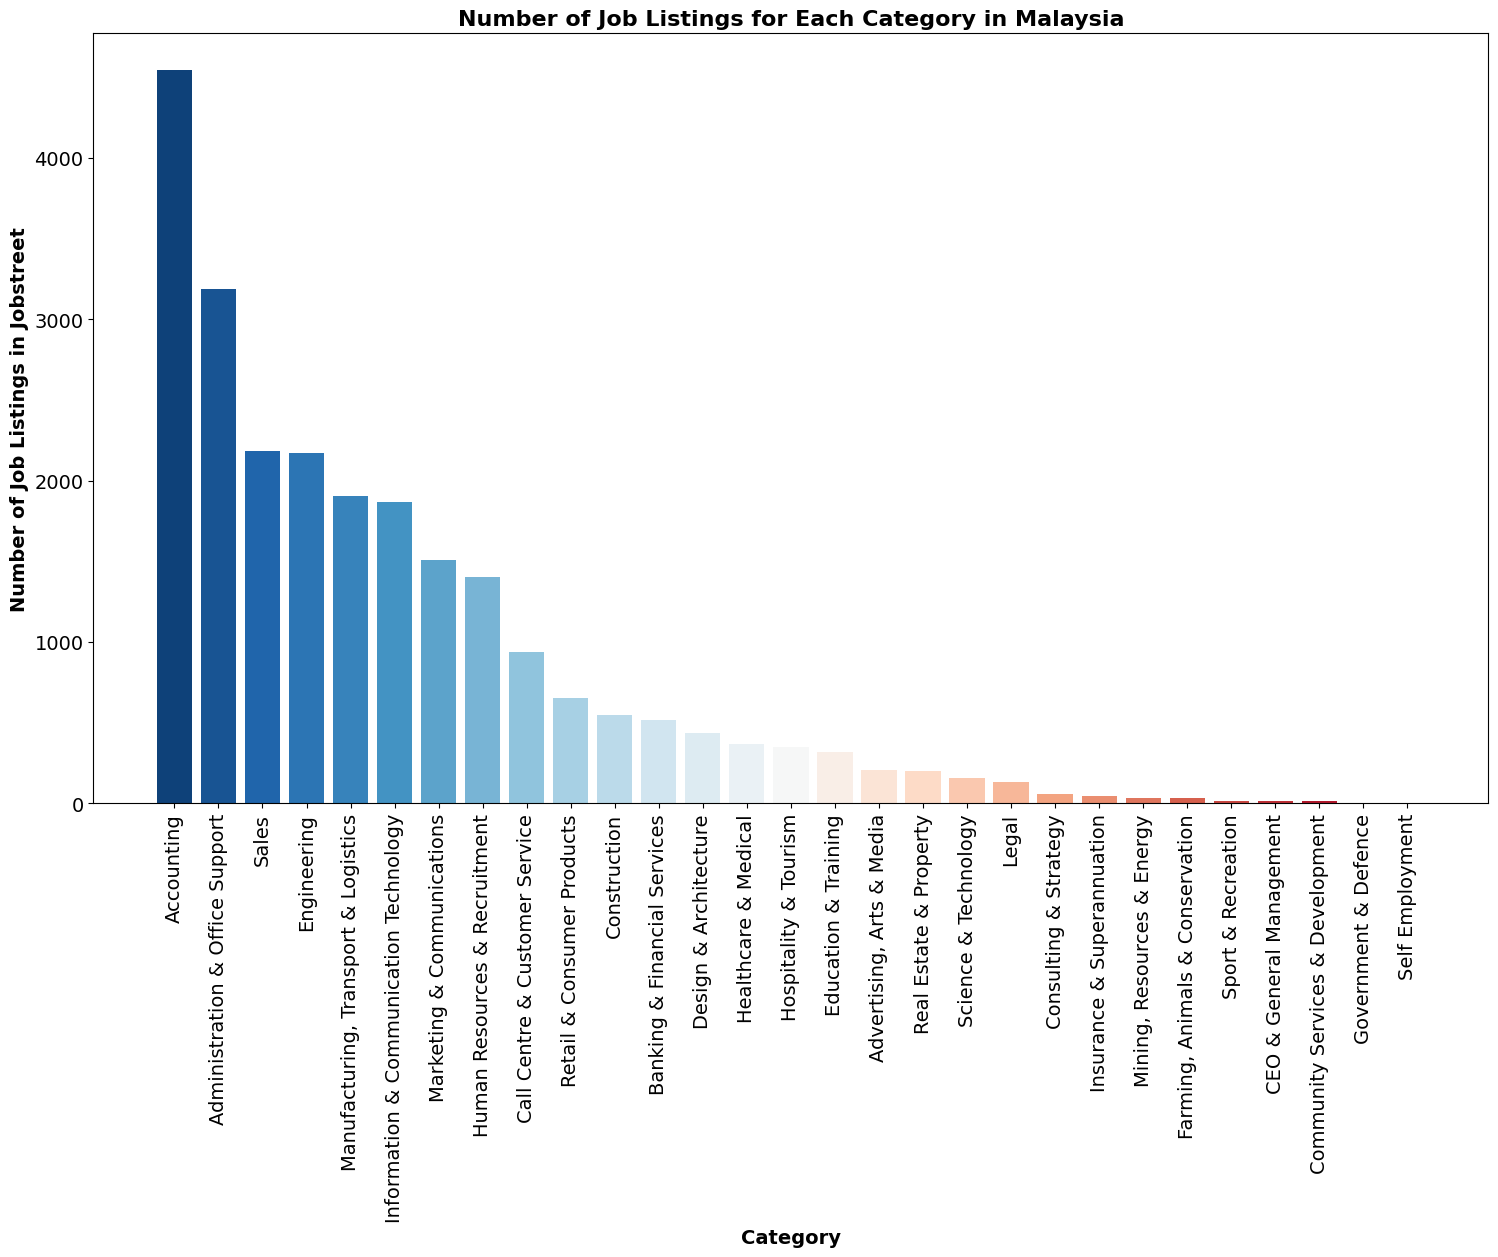

In [29]:
# Get the counts of job listings by category
category_counts = df_no_outliers['category'].value_counts()

# Create the bar chart
fig = plt.figure(figsize=(18, 10))

# Generate a reversed color palette so darker shades correspond to higher values
sequential_colors = sns.color_palette("RdBu", len(category_counts))[::-1]  # Reversing the palette

# Sort the category_counts to align colors from highest to lowest
category_counts = category_counts.sort_values(ascending=False)

# Map the colors: higher counts get darker shades
colors = [sequential_colors[i] for i in range(len(category_counts))]

# Plot the bar chart with the mapped colors
plt.bar(category_counts.index, category_counts.values, color=colors)

# Add labels and title with bold text and increased font size
plt.xlabel('Category', fontsize=14, fontweight='bold')
plt.ylabel('Number of Job Listings in Jobstreet', fontsize=14, fontweight='bold')
plt.title('Number of Job Listings for Each Category in Malaysia', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.show()

#### <b> Data Cleaning on Date</b>

In [30]:
df_no_outliers['listingDate'] = pd.to_datetime(df_no_outliers['listingDate'], errors='coerce')

# <span style="color:#E888BB; font-size: 1%;">3 | Feature Engineering </span>
<div style="padding: 30px;color:white;margin:10;font-size:150%;text-align:left;display:fill;border-radius:10px;background-color:#F1C40F;overflow:hidden;background-image: url(https://ttgmice.2017.ttgasia.com/wp-content/uploads/sites/3/2023/09/Ringitt_640.jpeg)"><b><span style='color:white'>3 | Feature Engineering </span></b> </div>

### <b>I <span style='color:#85BB65'>|</span> Adding "years of experience" column</b>

In [31]:
import re

def extract_experience_phrase(description):
    if not isinstance(description, str):
        return None  # Return None if the description is not a string

    # Regex to match the entire phrase like "5 years of experience"
    match = re.search(r'(\d+)(?:\s*-\s*(\d+))?\s*[+-]?\s*years?(?:\s*of experience)?', description, re.IGNORECASE)

    if match:
        return match.group(0)  # Return the full matched phrase

    return None  # Return None if no match

In [32]:
df_no_outliers['experience_phrase'] = df_no_outliers['descriptions'].apply(extract_experience_phrase)

In [33]:
def convert_experience_to_integer(phrase):
    if not isinstance(phrase, str):
        return 0  # Default to 0 if no valid phrase

    # Match the numbers in the phrase
    match = re.search(r'(\d+)(?:\s*-\s*(\d+))?', phrase)

    if match:
        start_years = int(match.group(1))
        end_years = int(match.group(2)) if match.group(2) else start_years
        return (start_years + end_years) // 2  # Average for ranges

    return 0  # Default if no match

In [34]:
df_no_outliers['years_experience'] = df_no_outliers['experience_phrase'].apply(convert_experience_to_integer)

In [35]:
df_no_outliers.loc[df_no_outliers['years_experience'] > 10, 'years_experience'] = 0

### <b>II <span style='color:#85BB65'>|</span> Adding "Management role" column</b>

- **If consist of word 'manager', 'director', 'head', 'lead', 'supervisor', 'chief', then considered as management role.**

In [36]:
def is_management_role(title):
    # List of management-related keywords
    management_keywords = ['manager', 'director', 'head', 'lead', 'supervisor', 'chief']

    # Check if the title is a string; if not, return 0
    if isinstance(title, str):
        for keyword in management_keywords:
            if keyword.lower() in title.lower():
                return 1
    return 0

# Fill missing values with an empty string (or another default value)
df_no_outliers['role'] = df_no_outliers['role'].fillna('')

df_no_outliers['management_role'] = df_no_outliers['role'].apply(is_management_role)

### <b> III <span style='color:#85BB65'>|</span> Group State to Region </b>

In [37]:
def assign_region(state):
    region_mapping = {
        # Central Region
        'Kuala Lumpur': 'Central Region',
        'Putrajaya': 'Central Region',
        'Selangor': 'Central Region',

        # Northern Region
        'Kedah': 'Northern Region',
        'Pulau Pinang': 'Northern Region',
        'Perak': 'Northern Region',
        'Perlis': 'Northern Region',

        # Southern Region
        'Johor': 'Southern Region',
        'Melaka': 'Southern Region',
        'Negeri Sembilan': 'Southern Region',

        # East Coast
        'Kelantan': 'East Coast',
        'Pahang': 'East Coast',
        'Terengganu': 'East Coast',

        # East Malaysia
        'Sarawak':'East Malaysia',
        'Sabah':'East Malaysia',
        'Labuan':'East Malaysia'
    }

    return region_mapping.get(state, 'Other')  # Default to 'Other' if state is not found

# Apply the function to your dataset
df_no_outliers['region'] = df_no_outliers['state'].apply(assign_region)

### <b> IV <span style='color:#85BB65'>|</span> Group Salary Range According to B40, M40 and T20 salary range </b>

- **B40** (Bottom 40%): Households earning up to RM5,249
- **M40** (Middle 40%): Households earning between RM5,250 and RM11,819
- **T20** (Top 20%): Households earning above RM11,819

In [38]:
# Define conditions for the salary range
conditions = [
    (df_no_outliers['average_salary'] <= 5249),
    (df_no_outliers['average_salary'] > 5249) & (df_no_outliers['average_salary'] <= 11819),
    (df_no_outliers['average_salary'] > 11819)
]

# Define corresponding labels for each condition
labels = ['B40', 'M40', 'T20']

# Assign salary_range based on the conditions
df_no_outliers['salary_range'] = np.select(conditions, labels, default='Unknown')

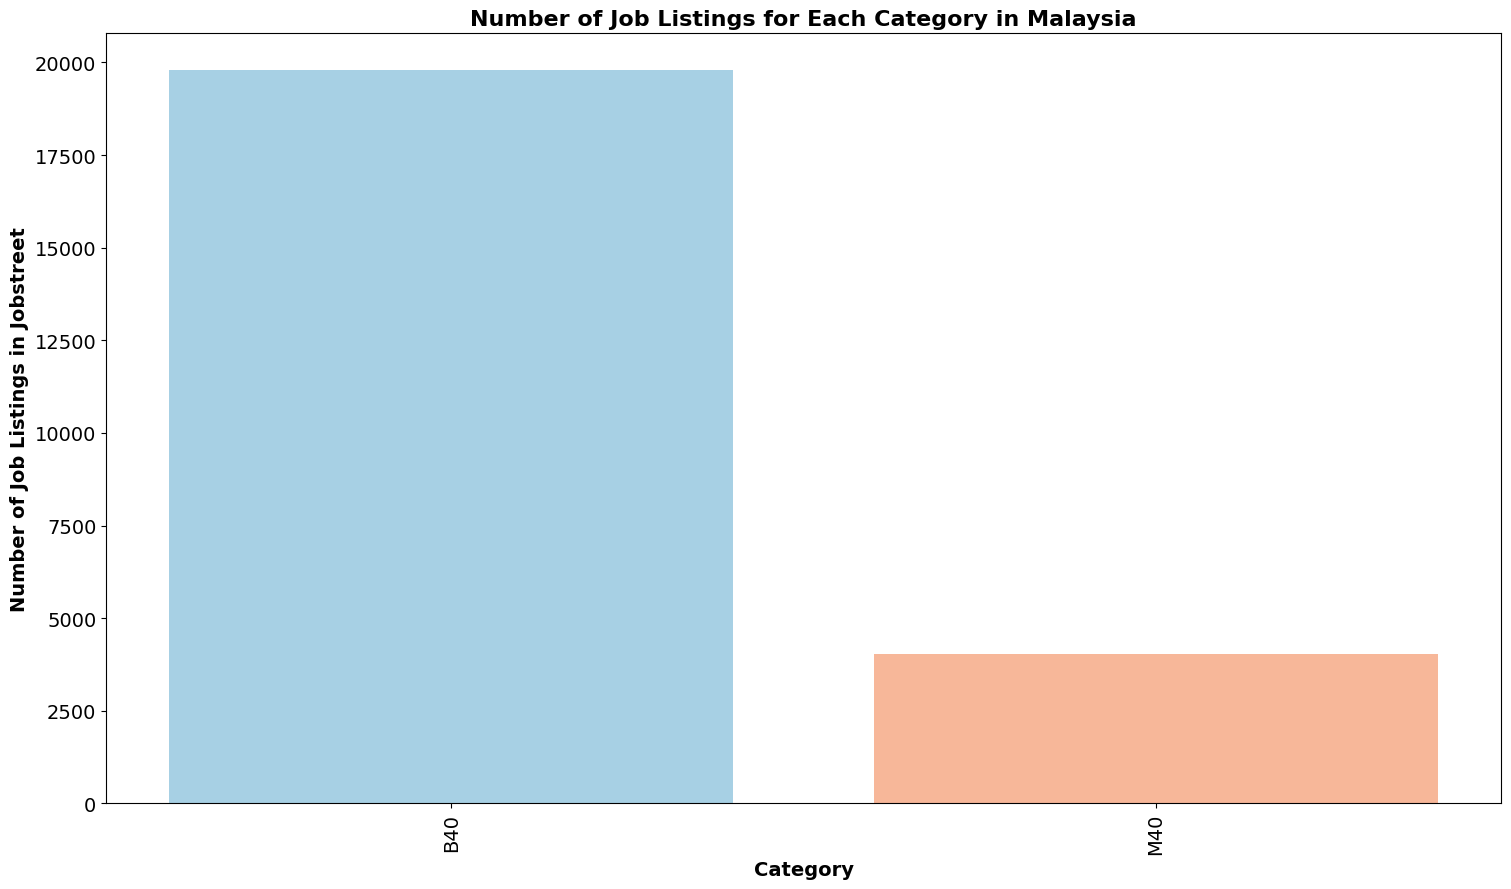

In [39]:
# Get the counts of job listings by category
salary_range_counts = df_no_outliers['salary_range'].value_counts()

# Create the bar chart
fig = plt.figure(figsize=(18, 10))

# Generate a reversed color palette so darker shades correspond to higher values
sequential_colors = sns.color_palette("RdBu", len(salary_range_counts))[::-1]  # Reversing the palette

# Sort the category_counts to align colors from highest to lowest
salary_range_counts = salary_range_counts.sort_values(ascending=False)

# Map the colors: higher counts get darker shades
colors = [sequential_colors[i] for i in range(len(salary_range_counts))]

# Plot the bar chart with the mapped colors
plt.bar(salary_range_counts.index, salary_range_counts.values, color=colors)

# Add labels and title with bold text and increased font size
plt.xlabel('Category', fontsize=14, fontweight='bold')
plt.ylabel('Number of Job Listings in Jobstreet', fontsize=14, fontweight='bold')
plt.title('Number of Job Listings for Each Category in Malaysia', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.show()

### <b> V <span style='color:#85BB65'>|</span> Add 'Year' and 'Month' Column from Job Listing Post </b>

In [40]:
df_no_outliers['Year'] = df_no_outliers['listingDate'].dt.year

In [41]:
df_no_outliers['Month'] = df_no_outliers['listingDate'].dt.month

# <span style="color:#E888BB; font-size: 1%;">4 | Bivariate Analysis </span>
<div style="padding: 30px;color:white;margin:10;font-size:150%;text-align:left;display:fill;border-radius:10px;background-color:#F1C40F;overflow:hidden;background-image: url(https://ttgmice.2017.ttgasia.com/wp-content/uploads/sites/3/2023/09/Ringitt_640.jpeg)"><b><span style='color:white'> 4 | Bivariate Analysis </span></b> </div>

### <b> I <span style='color:#85BB65'>|</span> Data visualization </b>

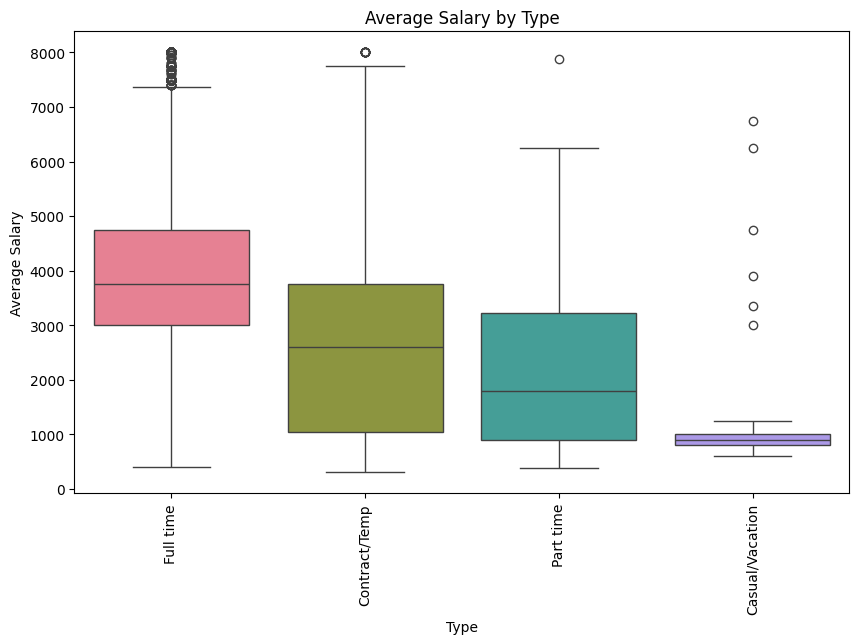

In [42]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='average_salary', data=df_no_outliers, palette="husl")
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.ylabel('Average Salary')
plt.title('Average Salary by Type')
plt.show()

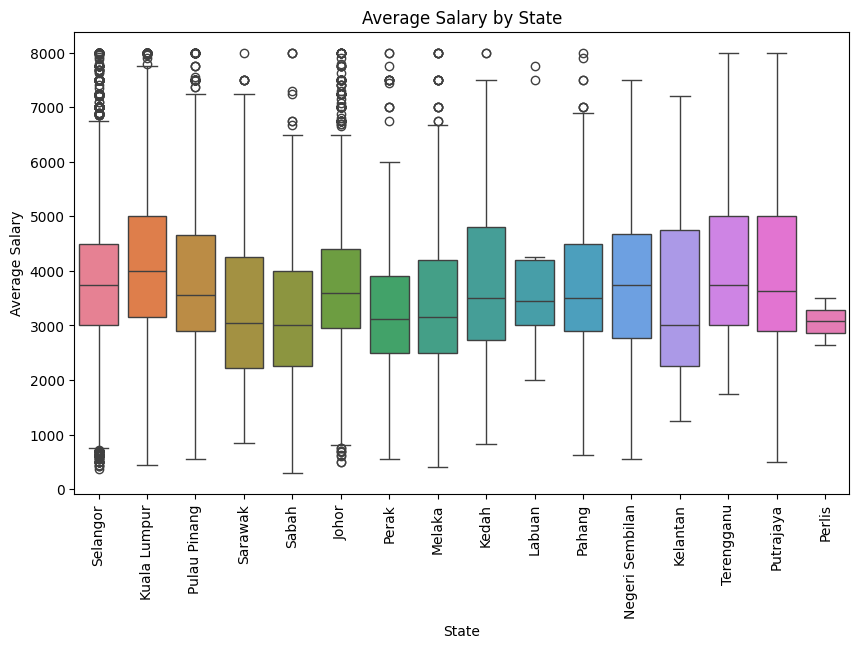

In [43]:
# Load the data
df_no_outliers.dropna(subset='state', inplace=True)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='state', y='average_salary', data=df_no_outliers, palette="husl")
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Average Salary')
plt.title('Average Salary by State')
plt.show()

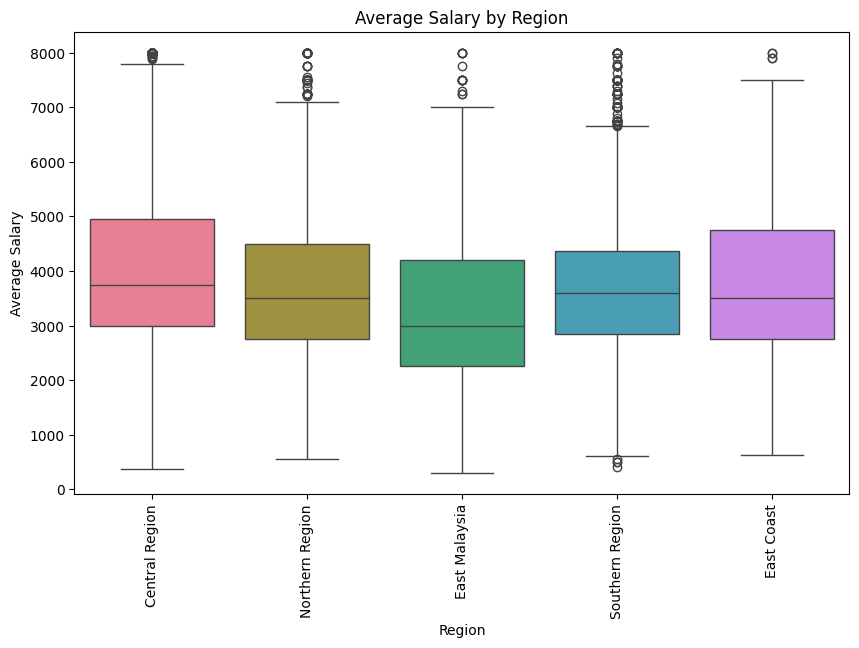

In [44]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='average_salary', data=df_no_outliers, palette="husl")
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Salary')
plt.title('Average Salary by Region')
plt.show()

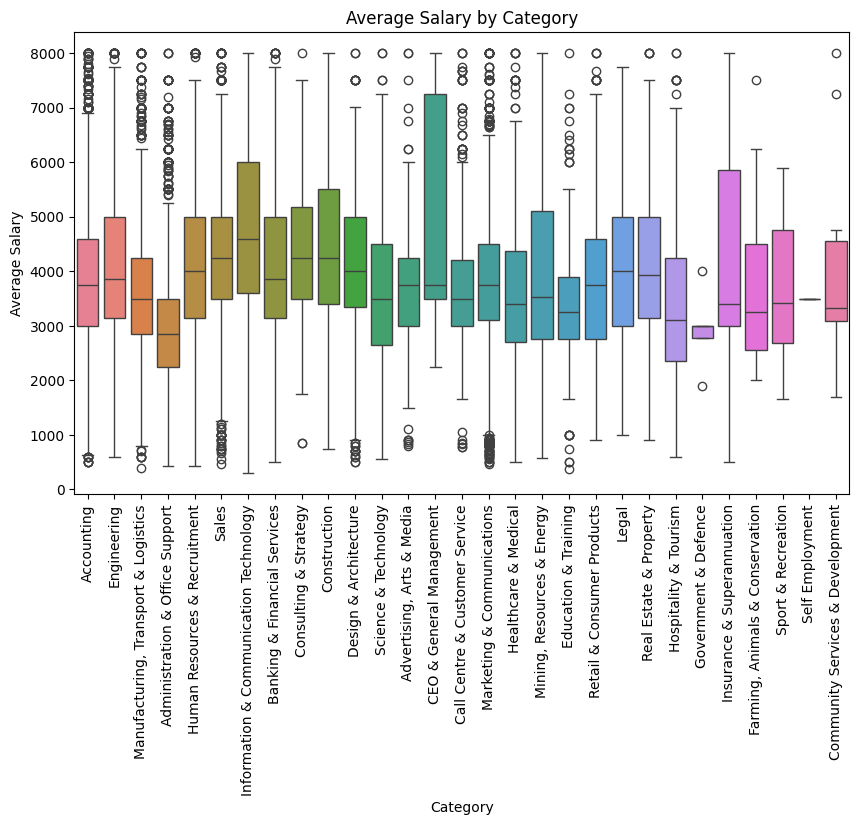

In [45]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='average_salary', data=df_no_outliers, palette="husl")
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Average Salary')
plt.title('Average Salary by Category')
plt.show()

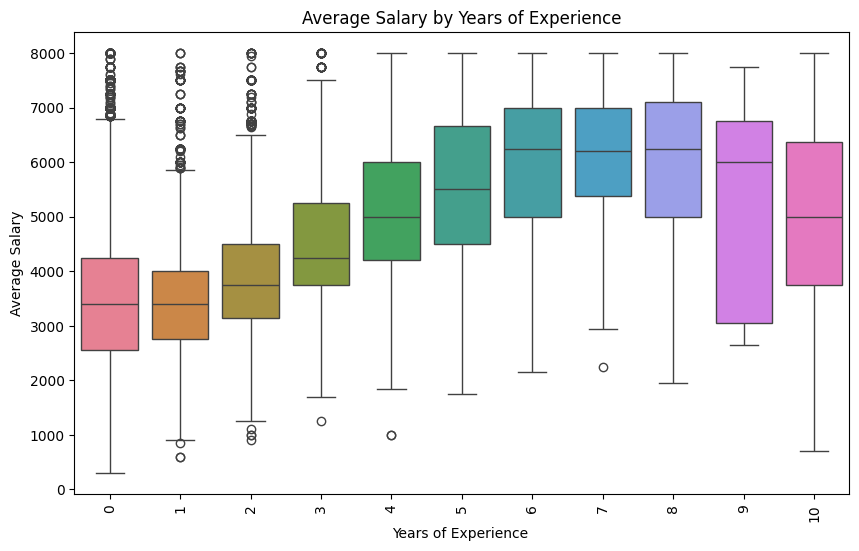

In [46]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='years_experience', y='average_salary', data=df_no_outliers, palette="husl")
plt.xticks(rotation=90)
plt.xlabel('Years of Experience ')
plt.ylabel('Average Salary')
plt.title('Average Salary by Years of Experience')
plt.show()

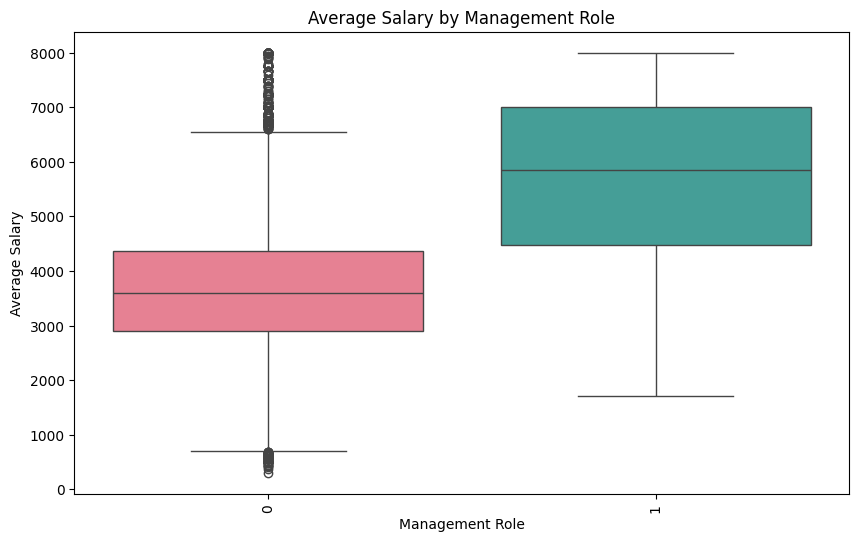

In [47]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='management_role', y='average_salary', data=df_no_outliers, palette="husl")
plt.xticks(rotation=90)
plt.xlabel('Management Role')
plt.ylabel('Average Salary')
plt.title('Average Salary by Management Role')
plt.show()

### <b> II <span style='color:#85BB65'>|</span> Correlation Analysis </b>

In [48]:
for col in ['type', 'state', 'region', 'category', 'years_experience','management_role']:
    print(f'Correlation by: {col}')
    print(df_no_outliers[[col, 'average_salary']].groupby(col).mean())

Correlation by: type
                 average_salary
type                           
Casual/Vacation     1530.367647
Contract/Temp       2824.112827
Full time           3982.803993
Part time           2320.717105
Correlation by: state
                 average_salary
state                          
Johor               3789.854305
Kedah               3786.433824
Kelantan            3449.548780
Kuala Lumpur        4166.603564
Labuan              3892.307692
Melaka              3523.489011
Negeri Sembilan     3770.627273
Pahang              3848.189441
Perak               3347.429952
Perlis              3075.000000
Pulau Pinang        3863.605522
Putrajaya           4010.714286
Sabah               3252.448586
Sarawak             3378.393305
Selangor            3854.687871
Terengganu          4150.576923
Correlation by: region
                 average_salary
region                         
Central Region      3982.640725
East Coast          3860.589888
East Malaysia       3329.478150
Northe

# <span style="color:#E888BB; font-size: 1%;">5 | Multivariate Analysis </span>
<div style="padding: 30px;color:white;margin:10;font-size:150%;text-align:left;display:fill;border-radius:10px;background-color:#F1C40F;overflow:hidden;background-image: url(https://images.pexels.com/photos/5466790/pexels-photo-5466790.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'>5 | Multivariate analysis </span></b> </div>

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 1. Preprocessing</span></b> </div>

### <b>Preprocessing and Scaling the data</b>

Preprocessing is a crucial step before training the model. In this case, numerical features are standardized (mean removed and scaled to unit variance), and categorical features are one-hot encoded. **<span style='color:#85BB65'>Standardization</span>** is not required for all models but is generally a good practice. **<span style='color:#85BB65'>One-hot encoding</span>** is necessary for categorical variables to be correctly understood by the machine learning model.

### <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 1a. Dealing with categorical variables</span></b> </div>

#### <b> Apply One-Hot Encoding to Categorical Variable </b>

In [49]:
df_analysis = df_no_outliers[['type', 'state', 'category','management_role', 'years_experience', 'average_salary']]

# Define the categorical columns
categorical_columns = ['type', 'state', 'category']
numerical_columns = ['years_experience', 'management_role','average_salary']

# One-hot encode the categorical columns
dummy_variables = pd.get_dummies(df_analysis, columns=categorical_columns, drop_first=False)


### <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 1b. Dealing with numerical variables</span></b> </div>

#### <b> Apply Z-score Normalization</b>

In [50]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical columns (average_salary, years_experience, management_role)
scaled_numerical = scaler.fit_transform(df_analysis[numerical_columns])

# Convert the scaled numerical columns into a DataFrame
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

# Drop the original numerical columns from dummy_variables
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

In [51]:
processed_df

type_Casual/Vacation type_Contract/Temp type_Full time type_Part time  \
0                    False              False           True          False   
1                    False              False           True          False   
2                    False              False           True          False   
3                    False              False           True          False   
4                    False              False           True          False   
...                    ...                ...            ...            ...   
22723                  NaN                NaN            NaN            NaN   
22737                  NaN                NaN            NaN            NaN   
23101                  NaN                NaN            NaN            NaN   
23187                  NaN                NaN            NaN            NaN   
23622                  NaN                NaN            NaN            NaN   

      state_Johor state_Kedah state_Kelantan state_Kuala Lumpur state_Labuan  \
0           False       False          False              False        False   
1           False       False          False              False        False   
2           False       False          False              False        False   
3           False       False          False              False        False   
4           False       False          False               True        False   
...           ...         ...            ...                ...          ...   
22723         NaN         NaN            NaN                NaN          NaN   
22737         NaN         NaN            NaN                NaN          NaN   
23101         NaN         NaN            NaN                NaN          NaN   
23187         NaN         NaN            NaN                NaN          NaN   
23622         NaN         NaN            NaN                NaN          NaN   

      state_Melaka  ... category_Mining, Resources & Energy  \
0            False  ...                               False   
1            False  ...                               False   
2            False  ...                               False   
3            False  ...                               False   
4            False  ...                               False   
...            ...  ...                                 ...   
22723          NaN  ...                                 NaN   
22737          NaN  ...                                 NaN   
23101          NaN  ...                                 NaN   
23187          NaN  ...                                 NaN   
23622          NaN  ...                                 NaN   

      category_Real Estate & Property category_Retail & Consumer Products  \
0                               False                               False   
1                               False                               False   
2                               False                               False   
3                               False                               False   
4                               False                               False   
...                               ...                                 ...   
22723                             NaN                                 NaN   
22737                             NaN                                 NaN   
23101                             NaN                                 NaN   
23187                             NaN                                 NaN   
23622                             NaN                                 NaN   

      category_Sales category_Science & Technology category_Self Employment  \
0              False                         False                    False   
1              False                         False                    False   
2              False                         False                    False   
3              False                         False                    False   
4              Fals

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 2. Correlation Heat Map </span></b> </div>

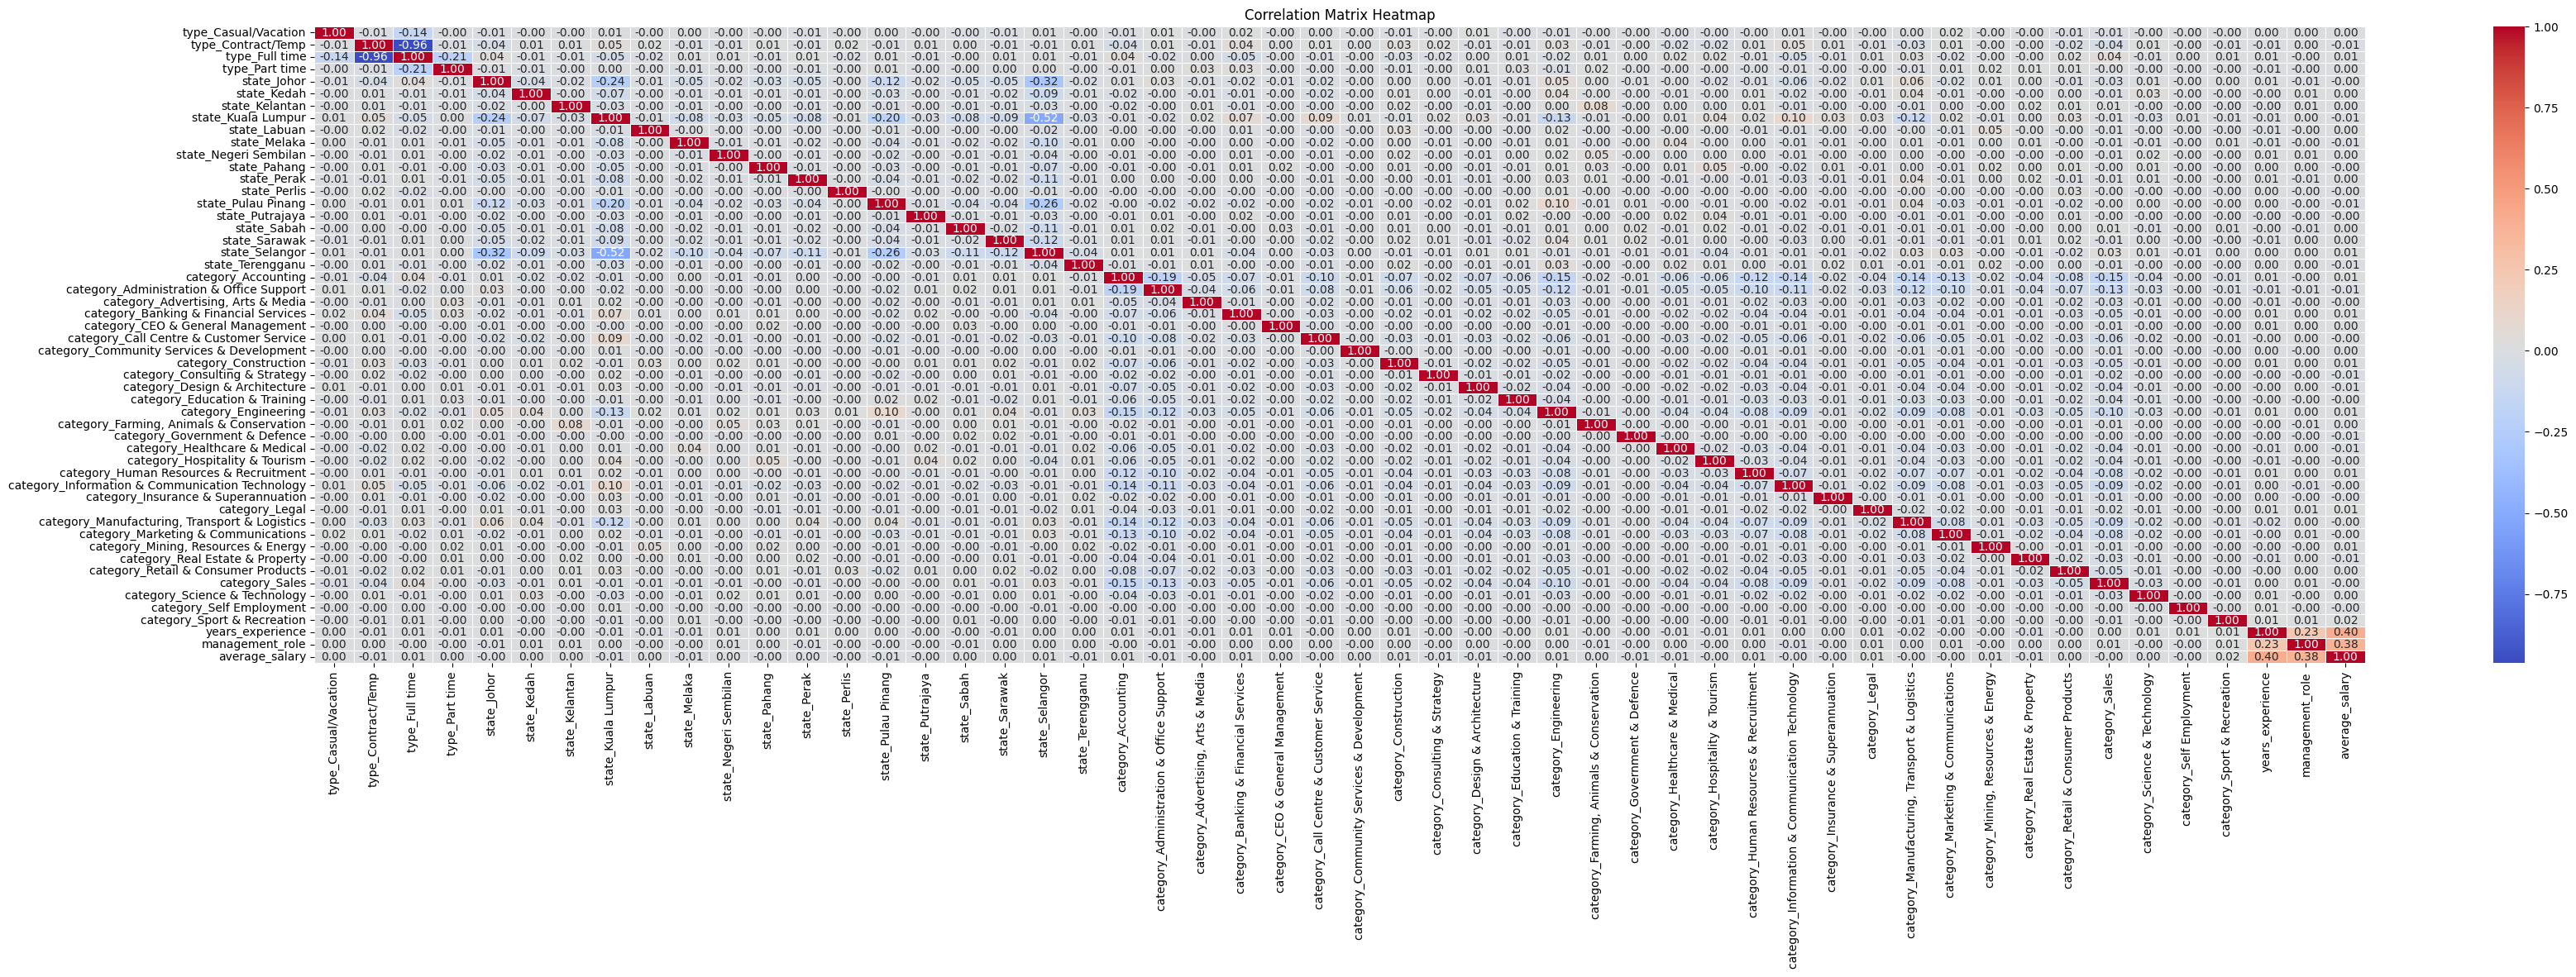

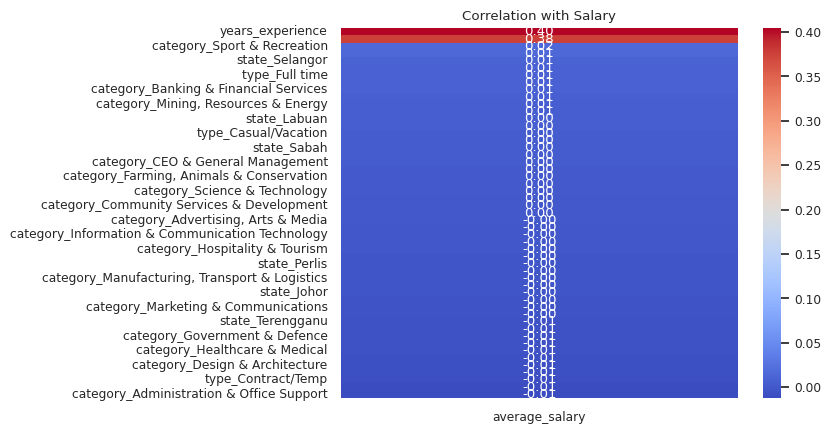

In [52]:
correlation_matrix = processed_df.corr()

#Graph I.
plt.figure(figsize=(40, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr = processed_df.corr()
target_corr = corr['average_salary'].drop('average_salary')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

#Graph II
# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Salary')
plt.show()

# <span style="color:#E888BB; font-size: 1%;">6 | Predictive Modelling </span>
<div style="padding: 30px;color:white;margin:10;font-size:150%;text-align:left;display:fill;border-radius:10px;background-color:#F1C40F;overflow:hidden;background-image: url(https://images.pexels.com/photos/5466790/pexels-photo-5466790.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'>6 | Predictive Modelling </span></b> </div>

<br>

In this study, we aim to build a machine learning model that can predict data science job salaries based on a given set of features, such as `employment type`, `year_of_experience`, `management_role`, `job category`and `state`.To achieve our goal, we use a dataset containing information on data science job salaries and related features.

<br>

### <b>I <span style='color:#85BB65'>|</span> Model development</b>

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV, PassiveAggressiveClassifier, RidgeClassifierCV, SGDClassifier, Perceptron
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [54]:
df_analysis = df_no_outliers[['type', 'state', 'category' ,'management_role', 'years_experience', 'average_salary']]

# Define government salary ranges
bin_edges = [0, 5249, 11819, np.inf]  # Define bins based on government ranges
salary_labels = ['B40', 'M40', 'T20']  # Corresponding labels for bins
df_analysis['salary_range'] = pd.cut(df_analysis['average_salary'], bins=bin_edges, labels=salary_labels, include_lowest=True)

# Label encoding for categorical features
encoder = LabelEncoder()
categorical_features = ['type', 'state', 'category']
for feature in categorical_features:
    df_analysis[feature] = encoder.fit_transform(df_analysis[feature])

# Split the dataset into training and testing sets
X = df_analysis.drop(["average_salary", "salary_range"], axis=1)
y = df_analysis["salary_range"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define MLA models
MLA = [
    AdaBoostClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    LogisticRegressionCV(),
    PassiveAggressiveClassifier(),
    RidgeClassifierCV(),
    SGDClassifier(),
    Perceptron(),
    BernoulliNB(),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC(probability=True),
    LinearSVC(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
]

# Cross-validation setup
cv_split = ShuffleSplit(n_splits=10, test_size=0.2, train_size=0.8, random_state=0)


### <b>II <span style='color:#85BB65'>|</span> Model Evaluation</b>

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Create a DataFrame to store model evaluation metrics
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD', 'MLA Time']
MLA_compare = pd.DataFrame(columns=MLA_columns)

# Model evaluation loop
row_index = 0
for alg in MLA:
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

    # Cross-validation results
    cv_results = cross_validate(alg, X, y, cv=cv_split, return_train_score=True)
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std() * 3

    # Fit the model and predict
    alg.fit(X_train, y_train)
    y_pred = alg.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f"{MLA_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

    # Add metrics to the DataFrame
    MLA_compare.loc[row_index, 'MLA Accuracy'] = accuracy
    MLA_compare.loc[row_index, 'MLA Precision'] = precision
    MLA_compare.loc[row_index, 'MLA Recall'] = recall
    MLA_compare.loc[row_index, 'MLA F1-Score'] = f1

    row_index += 1

# Sort results by F1-Score or any other metric
MLA_compare.sort_values(by=['MLA F1-Score'], ascending=False, inplace=True)
MLA_compare


AdaBoostClassifier - Accuracy: 0.86, Precision: 0.84, Recall: 0.86, F1-Score: 0.83
BaggingClassifier - Accuracy: 0.86, Precision: 0.84, Recall: 0.86, F1-Score: 0.84
ExtraTreesClassifier - Accuracy: 0.86, Precision: 0.84, Recall: 0.86, F1-Score: 0.84
GradientBoostingClassifier - Accuracy: 0.87, Precision: 0.85, Recall: 0.87, F1-Score: 0.85
RandomForestClassifier - Accuracy: 0.86, Precision: 0.84, Recall: 0.86, F1-Score: 0.84
LogisticRegressionCV - Accuracy: 0.85, Precision: 0.83, Recall: 0.85, F1-Score: 0.82
PassiveAggressiveClassifier - Accuracy: 0.63, Precision: 0.80, Recall: 0.63, F1-Score: 0.67
RidgeClassifierCV - Accuracy: 0.85, Precision: 0.83, Recall: 0.85, F1-Score: 0.82
SGDClassifier - Accuracy: 0.85, Precision: 0.82, Recall: 0.85, F1-Score: 0.82
Perceptron - Accuracy: 0.85, Precision: 0.82, Recall: 0.85, F1-Score: 0.81
BernoulliNB - Accuracy: 0.85, Precision: 0.83, Recall: 0.85, F1-Score: 0.83
GaussianNB - Accuracy: 0.85, Precision: 0.84, Recall: 0.85, F1-Score: 0.84
KNeighbor

MLA Name  \
3      GradientBoostingClassifier   
1               BaggingClassifier   
4          RandomForestClassifier   
11                     GaussianNB   
18  QuadraticDiscriminantAnalysis   
15         DecisionTreeClassifier   
2            ExtraTreesClassifier   
16            ExtraTreeClassifier   
17     LinearDiscriminantAnalysis   
0              AdaBoostClassifier   
13                            SVC   
12           KNeighborsClassifier   
10                    BernoulliNB   
14                      LinearSVC   
7               RidgeClassifierCV   
8                   SGDClassifier   
5            LogisticRegressionCV   
9                      Perceptron   
6     PassiveAggressiveClassifier   

                                       MLA Parameters MLA Train Accuracy Mean  \
3   {'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...                0.870436   
1   {'bootstrap': True, 'bootstrap_features': Fals...                0.885484   
4   {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...                0.886669   
11           {'priors': None, 'var_smoothing': 1e-09}                0.849465   
18  {'priors': None, 'reg_param': 0.0, 'store_cova...                0.851167   
15  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...                0.886675   
2   {'bootstrap': False, 'ccp_alpha': 0.0, 'class_...                0.886675   
16  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...                0.886675   
17  {'covariance_estimator': None, 'n_components':...                0.851178   
0   {'algorithm': 'deprecated', 'estimator': None,...                0.861141   
13  {'C': 1.0, 'break_ties': False, 'cache_size': ...                0.852121   
12  {'algorithm': 'auto', 'leaf_size': 30, 'metric...                  0.8663   
10  {'alpha': 1.0, 'binarize': 0.0, 'class_prior':...                0.851209   
14  {'C': 1.0, 'class_weight': None, 'dual': 'auto...                0.850361   
7   {'alphas': (0.1, 1.0, 10.0), 'class_weight': N...                0.850382   
8   {'alpha': 0.0001, 'average': False, 'class_wei...                0.814047   
5   {'Cs': 10, 'class_weight': None, 'cv': None, '...                0.852358   
9   {'alpha': 0.0001, 'class_weight': None, 'early...                0.739138   
6   {'C': 1.0, 'average': False, 'class_weight': N...                0.835039   

   MLA Test Accuracy Mean MLA Test Accuracy 3*STD   MLA Time  MLA Accuracy  \
3                0.870432                0.014131   0.986415      0.866596   
1                0.863962                0.017167   0.161816      0.860485   
4                0.864658                0.017056   1.108198      0.860274   
11               0.852097                0.015113   0.026609      0.851423   
18               0.854373                 0.01571   0.045014      0.852266   
15               0.863709                0.017726   0.061361      0.858588   
2                0.864658                0.017503   0.998795      0.858588   
16               0.862677                0.018557   0.047972      0.857323   
17               0.854942                0.017329   0.077654      0.850790   
0                0.863224                0.015687   1.623665      0.859009   
13               0.854457                0.016632  56.623222      0.850580   
12               0.852392                0.019683   0.042202      0.847208   
10                0.85393                0.016315   0.076362      0.848894   
14               0.854015                0.017714   0.087309      0.849947   
7                0.854015                0.017714   0.086828      0.849947   
8                0.815659                0.300378   0.233898      0.845522   
5                0.855574                0.016099   1.796444      0.850369   
9                0.742698                0.372655   0.076731      0.845732   
6                0.836797                0.051486   0.046463      0.626976   

    MLA Precision  MLA Recall  MLA F1-Score  
3        0.854198    0.866596      0.845801  
1        0

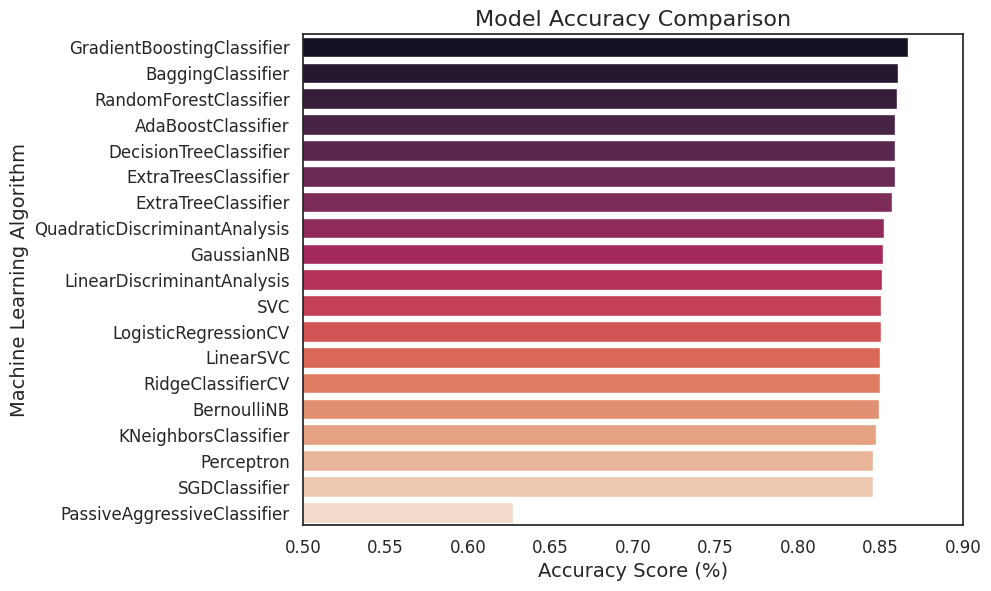

In [56]:
# Drop rows with NaN values in MLA_compare
MLA_compare_clean = MLA_compare.dropna()

# Sort by MLA Accuracy in descending order
MLA_compare_sorted = MLA_compare_clean.sort_values(by='MLA Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='MLA Accuracy', y='MLA Name', data=MLA_compare_sorted, palette="rocket")
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Accuracy Score (%)', fontsize=14)
plt.ylabel('Machine Learning Algorithm', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0.5,0.9)
plt.tight_layout()
plt.show()


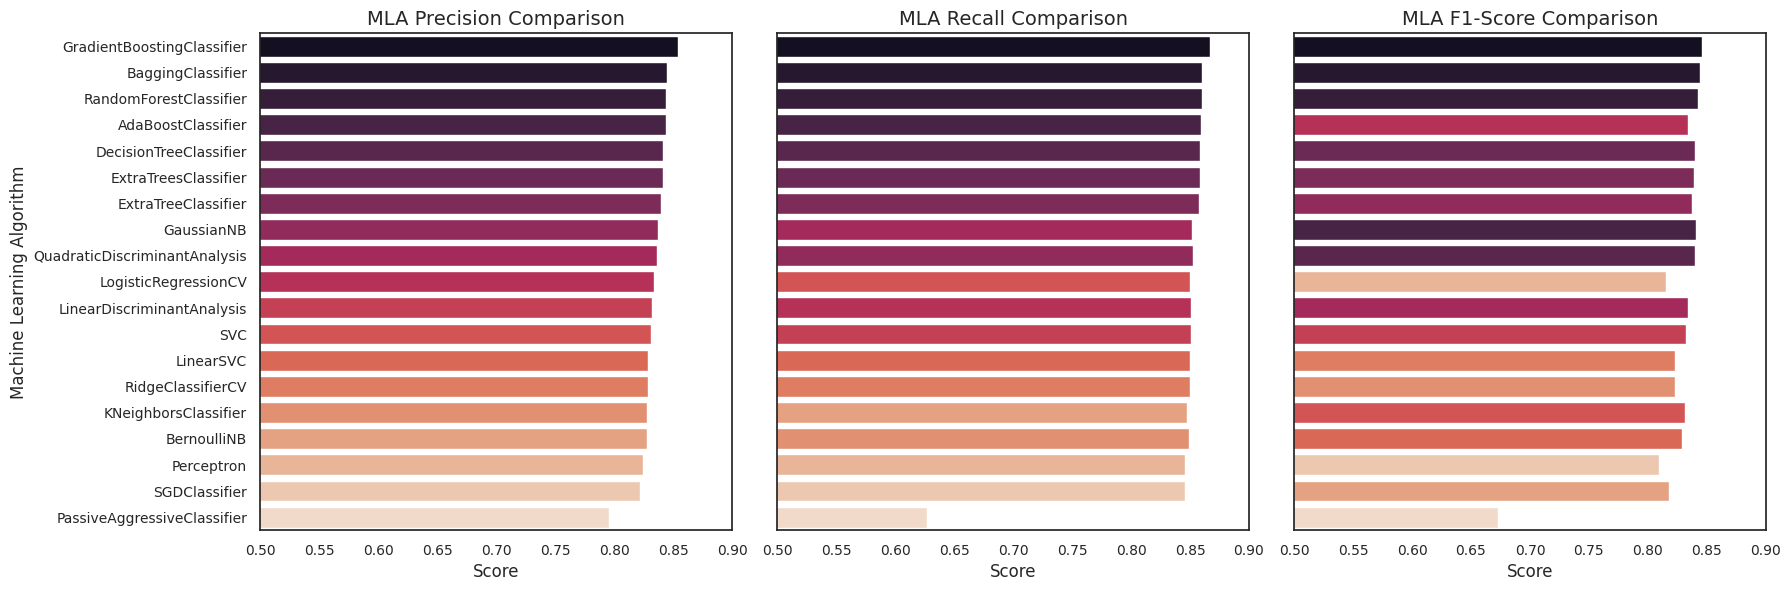

In [57]:
# Drop rows with NaN values in MLA_compare
MLA_compare_clean = MLA_compare.dropna()

# Metrics to plot
metrics = ['MLA Precision', 'MLA Recall', 'MLA F1-Score']

# Create a figure for three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, metric in enumerate(metrics):
    # Sort by the current metric
    MLA_compare_sorted = MLA_compare_clean.sort_values(by=metric, ascending=False)

    # Plot each metric independently
    sns.barplot(
        x=metric,
        y='MLA Name',
        data=MLA_compare_sorted,
        ax=axes[i],
        palette="rocket"
    )
    axes[i].set_title(f'{metric} Comparison', fontsize=14)
    axes[i].set_xlabel('Score', fontsize=12)
    axes[i].set_ylabel('' if i > 0 else 'Machine Learning Algorithm', fontsize=12)
    axes[i].set_xlim(0.5,0.9)
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

### <b>III <span style='color:#85BB65'>|</span> Hyperparameter Tuning</b>

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100],         # Number of boosting stages
    'learning_rate': [0.1, 0.2],     # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5],                # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
}

# Initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gbc,
    param_grid=param_grid,
    cv=5,                   # 5-fold cross-validation
    scoring='accuracy',     # Optimize for accuracy
    verbose=2,
    n_jobs=-1               # Use all available cores
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Display the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the tuned model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits


KeyboardInterrupt: 

### <b>IV <span style='color:#85BB65'>|</span> Feature Importance Evaluation </b>

In [59]:
# Fit the Gradient Boosting model
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Extract feature importance
feature_importances = gb_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

importance_df

Feature  Importance
3   management_role    0.508618
4  years_experience    0.274252
2          category    0.173680
1             state    0.038027
0              type    0.005423

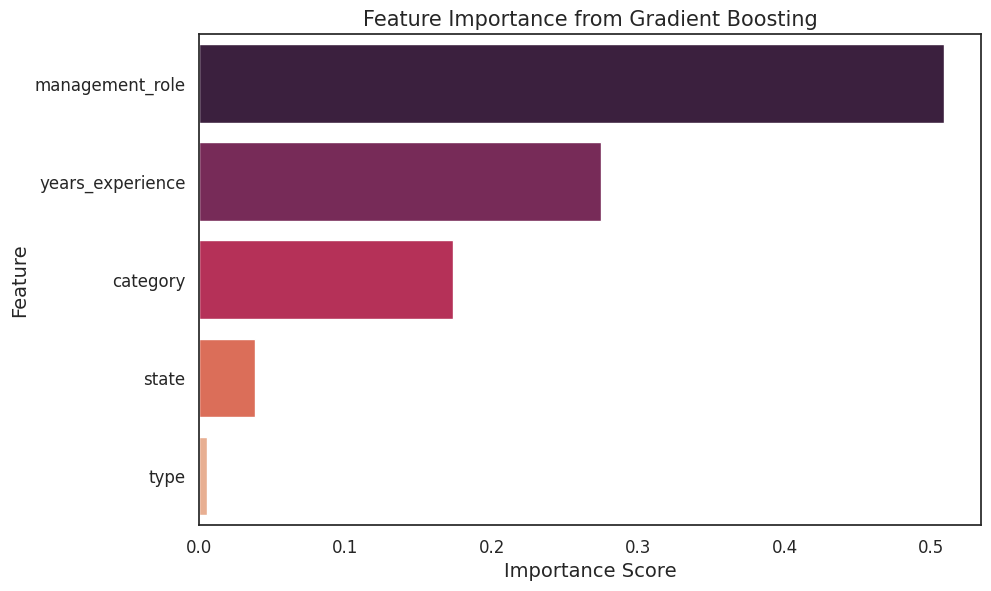

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='rocket')
plt.title('Feature Importance from Gradient Boosting', fontsize=15)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Feature',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()